In [38]:
## ライブラリのインポート ##
import os
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import scipy.stats as stats

In [3]:

## テキストデータをnumpy形式に変換する(解析のための下準備) ##
###  必ず使用する  ###
def Text2Numpy(**args):
    """
    大学にある重心動揺計の計測データ（csv）を取り込み，pythonで処理しやすいように変換するための関数
    filename:処理したいファイル名
    """    
    ## データを開く ##
    with open(args["filename"],"r",encoding="shift-jis") as dat:
        datacop= dat.read()

    ## 書き出し先を作る ##
    COPdata = {"ID":None,"sex":None,"age":None,"height":None,"weight":None,"cop":[]}
    attribute = {"ID":0,"sex":2,"age":3,"height":4,"weight":5}
    ## 処理1 ##
    ### データの整理 ###
    d0 = datacop.split("\n") # スプリット
    COPdata["ID"] = d0[attribute["ID"]].split(",")[1][1:-1]# IDの取り出し
    COPdata["sex"] = d0[attribute["sex"]].split(",")[1][1:-1]# 性別の取り出し
    COPdata["age"] = (d0[attribute["age"]].split(",")[1][1:-1])# 年齢の取り出し
    COPdata["height"] = (d0[attribute["height"]].split(",")[1][1:-1])# 身長の取り出し
    COPdata["weight"] = (d0[attribute["weight"]].split(",")[1][1:-1])# 体重の取り出し

    for i in d0[7:]:
        if len(i)==0:
            break
            
        nn = i.split(",")
        if args["Weightshow"]==True:
            ww = nn[0:3]+[nn[5]]
        else:
            ww = nn[0:3]
            
        COPdata["cop"].append(list(map(float,ww)))

    COPdata["cop"] = np.array(COPdata["cop"])
    
    ## 処理1完了 ##
    return COPdata

In [29]:
A = Text2Numpy(filename="/Users/tumh/Desktop/0509COP/181P003_2.csv",Weightshow=True)

In [73]:
A["cop"]

array([[ 0.0000e+00, -1.3400e-01, -1.5220e+00,  5.9209e+01],
       [ 1.0000e-02, -1.3000e-01, -1.5100e+00,  5.9204e+01],
       [ 2.0000e-02, -1.3000e-01, -1.5030e+00,  5.9175e+01],
       ...,
       [ 2.9980e+01, -3.3700e-01,  4.5300e-01,  5.8936e+01],
       [ 2.9990e+01, -3.4900e-01,  4.5500e-01,  5.8999e+01],
       [ 3.0000e+01, -3.6800e-01,  4.5800e-01,  5.9058e+01]])

In [31]:
B = A["cop"].copy()

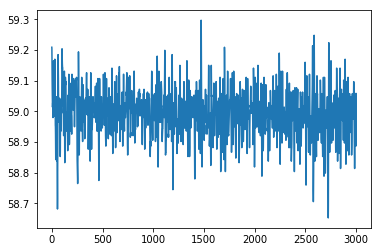

In [32]:
plt.plot(B[:,3])

In [33]:
def FFT(a,wave,bias):
    '''
    高速フーリエ変換
    '''
    xfft = np.fft.fft(a, n=None, axis=-1, norm=None)
    xfft[wave:(-1)*wave]=0
    if bias:
        xfft[0]=0
    xifft = np.fft.ifft(xfft)
    return xifft.real

In [34]:
ww = int(len(B)*4/(1/0.01))  

(-2, 2)

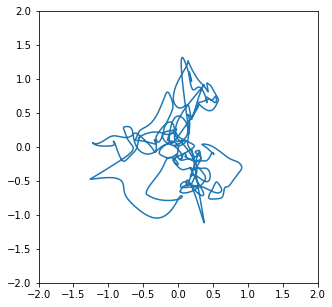

In [35]:
#plt.plot(B[500:(2048+500),3][300:400])
#plt.plot(FFT(B[500:(2048+500),3],ww,True)[300:1000])
fig = plt.figure(figsize=(5,5))
plt.plot(FFT(B[500:(2048+500),1],ww,True),FFT(B[500:(2048+500),2],ww,True))
plt.xlim(-2,2)
plt.ylim(-2,2)

In [43]:
x

array([58.98 , 58.999, 58.999, ..., 58.95 , 58.916, 58.877])

95% interval: 58.99 < x <  59.00


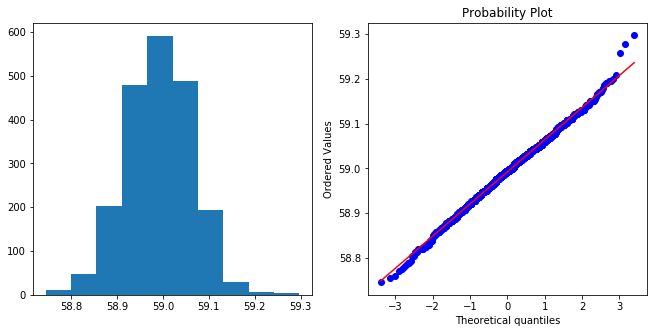

In [72]:
x=B[500:(2048+500),3]
fig,(ax1,ax2) = plt.subplots(ncols=2,figsize=(11,5))
ax1.hist(x)
ax2 = stats.probplot(x,dist="norm",plot=plt)
t_dist = stats.t(loc=x.mean(),scale=stats.sem(x),df=len(x)-1)
bottom,up = t_dist.interval(alpha=0.95)
print('95% interval:{: .2f} < x < {: .2f}'.format(bottom,up))
#xm = x.mean()
#se = np.sqrt(np.var(x)/len(x))
#bottom,up = xm-1.96*se,xm+1.96*se  ## 95%の場合

58.99516655750285

In [69]:
up

58.99516909742265

In [49]:
import pandas as pd

ディレクトリ構造

データの読み込み

Markdownによるレポート作成

In [49]:
stats.sem?

In [50]:
np.sqrt?